In [3]:
import numpy as np
import pandas as pd

from scipy.stats.distributions import poisson
import matplotlib.pyplot as plt

import pymc3 as pm

In [8]:
rv = poisson(4) #shape parameter lambda

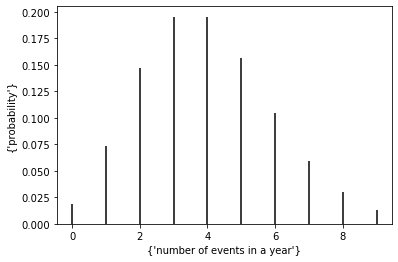

In [10]:
nevents = np.arange(10)

plt.vlines(nevents, 0, rv.pmf(nevents))
plt.xlabel({'number of events in a year'})
plt.ylabel({'probability'})
plt.ylim(ymin=0);

In [12]:
#masked values allows you to mask a specified value

disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)


years = np.arange(1851, 1962)



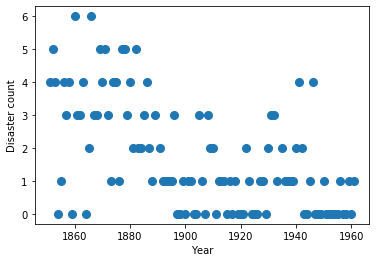

In [16]:
plt.plot(years, disaster_data, 'o', markersize=8 )
plt.ylabel('Disaster count')
plt.xlabel('Year');

In [19]:
with pm.Model() as simple_disaster_model:
    rate = pm.Exponential('rate', 1)
    
    disasters = pm.Poisson('disasters', rate , observed=disaster_data)

/opt/conda/lib/python3.7/site-packages/pymc3/model.py:1430: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [20]:
with simple_disaster_model:
    trace = pm.sample(1000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [rate]
>Metropolis: [disasters_missing]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:05<00:00, 268.97it/s]
The number of effective samples is smaller than 25% for some parameters.


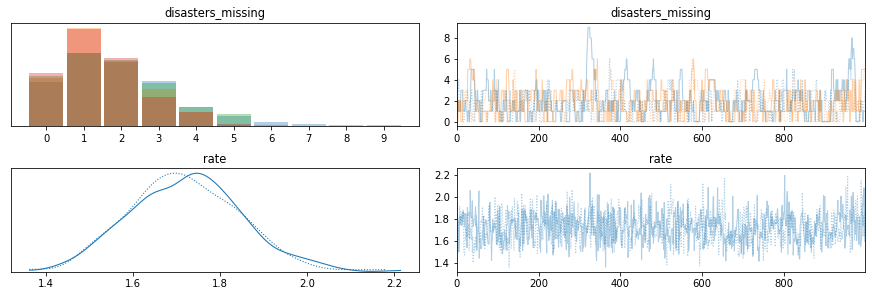

In [21]:
pm.traceplot(trace);

In [23]:
with pm.Model() as disaster_model:
    
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)
    
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    
    rate = pm.math.switch(switchpoint >= years , early_rate , late_rate)
    
    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

/opt/conda/lib/python3.7/site-packages/pymc3/model.py:1430: ImputationWarning: Data in disasters contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [25]:
with disaster_model:
    trace = pm.sample(1000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:08<00:00, 173.70it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [26]:
!pip install lxml bs4

     |████████████████████████████████| 5.7 MB 2.7 MB/s eta 0:00:01     |██████████▋                     | 1.9 MB 1.3 MB/s eta 0:00:04
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=01f069a12703e72c66a29d5fae10d2f5d30d1d4154f4f409322df1b64f69c152
  Stored in directory: /home/jovyan/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [29]:
data = pd.read_html('http://www.stormfax.com/huryear.htm', header=0)[0][:-2]
data

,Year,Named Storms,Hurricanes,MajorHurricanes,Unnamed: 4
0,1851,6.0,3.0,1.0,NaN
1,1852,5.0,5.0,1.0,NaN
2,1853,8.0,4.0,2.0,NaN
3,1854,5.0,3.0,1.0,NaN
4,1855,5.0,4.0,1.0,NaN
...,...,...,...,...,...
162,2013,14.0,2.0,0.0,NaN
163,2014,8.0,6.0,2.0,NaN
164,2015,11.0,4.0,2.0,NaN
165,2016,15.0,7.0,4.0,NaN


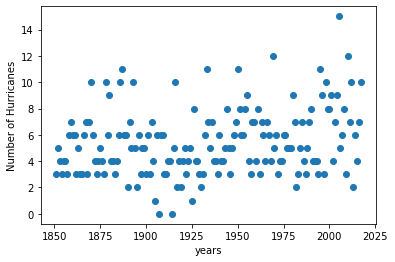

In [31]:
years = data['Year'].astype('int')
nhurricanes = data['Hurricanes']

plt.scatter(years, nhurricanes)
plt.xlabel('years')
plt.ylabel('Number of Hurricanes');

Coin Flipping again

In [42]:
a = 1000
b = 1000
N = 100
z = 40

In [43]:
Y = np.concatenate((np.ones(z), np.zeros(N-z)))
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
flip_model = pm.Model()

with flip_model:
    theta = pm.Beta('bias', alpha=a , beta=b)
    
    #Y_obs = pm.Bernoulli('Y_obs', p=theta , observed=Y)

In [47]:
with flip_model:
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [bias]
Sampling chain 1, 0 divergences: 100%|██████████| 5500/5500 [00:13<00:00, 408.62it/s]


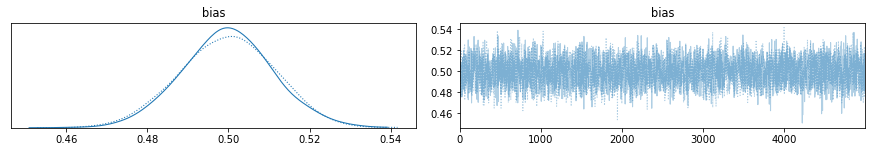

In [48]:
pm.traceplot(trace);